#Q1

In [1]:
import numpy as np
from keras.datasets import mnist
import random

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

In [17]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

In [36]:
class Network(object):
    def __init__(self,sizes): # sizes is a list containing the network.
                              # eg : [784,128,10] means input =784 neurons,
                              #    1st hidden layer 128 neurons, output 10 neurons.
        self.sizes=sizes
        self.num_layers=len(sizes)
        self.weights= [np.random.randn(x,y) for x,y in zip(sizes[1:],sizes[:-1])]
        self.biases= [np.random.randn(y, 1) for y in sizes[1:]]

    # def show(self):
    #   print(self.num_layers)
    #   for bias in self.biases:
    #     print(bias.shape)
    #   for weight in self.weights:
    #     print(weight.shape)

# stop_zone 1. Comment out all the code below. Select all rows below. Click Ctrl + /.
# Include the show function given below above this comment area inside the class.
# Run this cell and then run the code with stop_zone 1 written below.
# After this testing, don't forget tto remove the comments. Same, select all, Ctrl+/.

    def forwardpropagation(self,a):
        for b,w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b) # sig (w.a +b)
            #print(a.shape)
        return a

# stop_zone 2. Comment out all the code below. Don't comment out the __init__ method else you will get error.
# Remove comment from print(a.shape) line above. Run this cell. And run the code with stop_zone 2 written below.


    def backpropagation(self,x,y):

        # nothing to do in this 3 lines.
        y_t = np.zeros((len(y), 10))
        y_t[np.arange(len(y)), y] = 1
        y_t= y_t.T

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer

        # write the same forward propagation code here but while doing so store the a's.
        for w,b in zip(self.weights,self.biases):
            activation= sigmoid(np.dot(w, activation)+b)
            activation_list.append(activation)

        delta= (activation_list[-1] - y_t) * activation_list[-1] * (1 - activation_list[-1])

        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1]=delta
        nabla_w[-1]=np.dot(delta, activation_list[-2].transpose())

        #print("{} {}".format(nabla_b[-1].shape,nabla_w[-1].shape) )

#stop_zone 3 : remove comment from the print statement just above and run the cell for stop_zone3.
# don't forget commenting out.

        # step 3 : calculation of delta for hidden layers

        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])
            delta= np.dot(self.weights[-j + 1].T, delta) * sig_der

            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]= delta
            nabla_w[-j]= np.dot(delta, activation_list[-j - 1].transpose())

#stop_zone 4 : Run the cell for stop_zone 4.
        return (nabla_b,nabla_w)

    # the functions below are complete. If you are fine till stop_zone 4, you can run
    # this whole cell and train, test the data by running the last cell of the question.
    # You may need to wait for around 10 minutes to see the test predictions.
    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]


    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+ mini_batch_size] for k in range(0,n_train,mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,lr)

            self.predict(train_data)
            print("Epoch {0} completed.".format(i+1))

    def predict(self,test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)),y) for x,y in test_data]
        # returns the index of that output neuron which has highest activation

        num= sum(int (x==y) for x,y in test_results)
        print ("{0}/{1} classified correctly.".format(num,len(test_data)))



In [33]:
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

(10, 1) (10, 64)
(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [37]:
net=Network([784,128,64,10])
net.SGD(train_data=train_data,epochs=10,mini_batch_size=20,lr=0.01)
print("Test data:")
net.predict(test_data)

1379/10000 classified correctly.
Epoch 1 completed.
1596/10000 classified correctly.
Epoch 2 completed.
1703/10000 classified correctly.
Epoch 3 completed.
1811/10000 classified correctly.
Epoch 4 completed.
1904/10000 classified correctly.
Epoch 5 completed.
1998/10000 classified correctly.
Epoch 6 completed.
2100/10000 classified correctly.
Epoch 7 completed.
2176/10000 classified correctly.
Epoch 8 completed.
2248/10000 classified correctly.
Epoch 9 completed.
2338/10000 classified correctly.
Epoch 10 completed.
Test data:
169/1000 classified correctly.


#Q2

In Q2, I was facing a lot of difficulty. I have taken the help of online texts and ChatGPT as well. I have tried my best but there are some errors but that was all i could manage.

<ipython-input-1-2c678be430bc>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array(dataset)


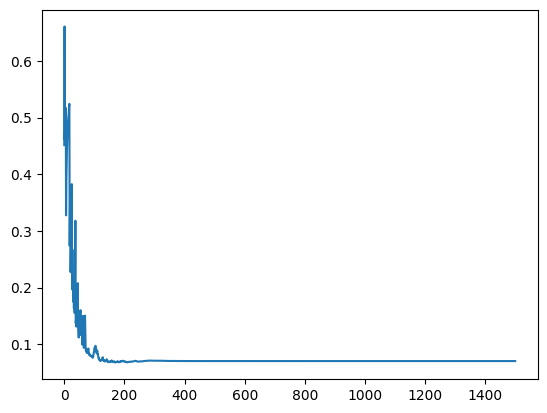

<ipython-input-1-2c678be430bc>:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a, b = (-w[0] / w[1], w[0])


TypeError: unsupported operand type(s) for /: 'float' and 'list'

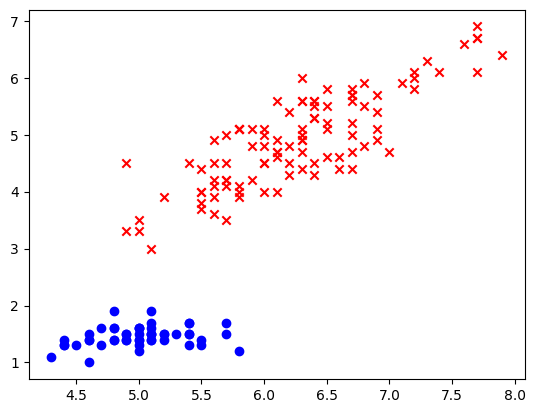

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# pre load sklearn iris datasets
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target

dataset = []

target_label = 0  # choose the target label of flower type

for index, x in enumerate(X):
    transform_label = None
    if Y[index] == target_label:
        transform_label = 1
    else:
        transform_label = 0
    x = [x[0], x[2]]
    dataset.append((x, transform_label))

dataset = np.array(dataset)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sgd(dataset, w, eta):
    # run sgd randomly
    index = random.randint(0, len(dataset) - 1)
    x, y = dataset[index]
    a = sigmoid(np.dot(w, x))
    gradient = (a - y) * np.array(x)
    w = w - eta * gradient
    return w


def cost(dataset, w):
    total_cost = 0
    for x, y in dataset:
        a = sigmoid(np.dot(w, x))
        total_cost += (y - a) ** 2
    return total_cost / len(dataset)*2


def logistic_regression(dataset):
    w = np.zeros(2)
    limit = 1500  # update times
    eta = 0.1  # update rate
    costs = []

    for i in range(limit):
        w = sgd(dataset, w, eta)
        current_cost = cost(dataset, w)
        costs.append(current_cost)
        eta = eta * 0.98  # decrease update rate

    plt.plot(range(limit), costs)
    plt.show()
    return w, (limit, costs)


def main():
    # execute
    w = logistic_regression(dataset)

    # draw
    ps = [v[0] for v in dataset]
    label = [v[1] for v in dataset]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    # plot via label
    tpx = []
    for index, label_value in enumerate(label):
        px = ps[index][0]
        py = ps[index][1]
        tpx.append(px)
        if label_value == 1:
            ax1.scatter(px, py, c='b', marker="o", label='O')
        else:
            ax1.scatter(px, py, c='r', marker="x", label='X')

    l = np.linspace(min(tpx), max(tpx))
    a, b = (-w[0] / w[1], w[0])
    ax1.plot(l, a * l + b, 'g-')
    plt.legend(loc='upper left')
    plt.show()

    limit = w[1][0]
    costs = w[1][1]
    w = w[0]

    # calculate score
    predicted_Y = []
    answer_Y = []
    for X, Y in dataset:
        a = sigmoid(np.dot(w, X))
        predicted_Y.append(a)
        answer_Y.append(Y)

    predicted_Y = np.asarray(predicted_Y)
    predicted_Y = predicted_Y > 0.5
    print(answer_Y)
    print(predicted_Y)


if __name__ == '__main__':
    main()
